# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number

>🔑 **Note:** Hyperparameter
* Input layer shape: Same shape as number of features(e.g. # bedrooms, # bathrooms, ...)
* Hidden layer(s): Problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer: Problem specific, generally 10 to 100
* Output layer shape: Same shape as desired prediction shape
* Hidden activation: Usually ReLU
* Output activation: None, ReLU, tanh
* Loss function: MSE, MAE
* Optimizer: SGD, Adam, ...

In [22]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


# Creating some data to view and to fit

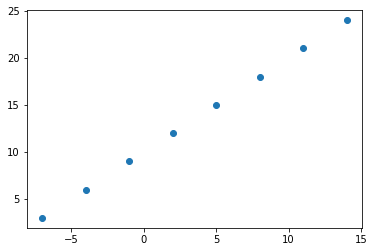

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24])

# Visualize
plt.scatter(X, y)

In [24]:
# This is the relationship our neural network should learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes


In [25]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939_700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [26]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [27]:
X[0].ndim

0

In [28]:
X[0], y[0]

(-7.0, 3.0)

In [29]:
# Turn our NumPy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how ring it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrix (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)]) # This way we're adding Layers like in a list. We can also use `model.add`

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error of predicted values
    optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 178ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [33]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [36]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we tool to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might chagen the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [51]:
# Let's rebuild our model
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error of predicted values
    optimizer=tf.keras.optimizers.SGD(),
    metrics = ["mae"])

# 3. Fit the model (train for longer this time)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 203ms/step - loss: 8.0233 - mae: 8.0233
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 7.8908 - mae: 7.8908
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 7.7583 - mae: 7.7583
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 7.6258 - mae: 7.6258
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4933 - mae: 7.4933
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4625 - mae: 7.4625
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4569 - mae: 7.4569
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4512 - mae: 7.4512
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4456 - mae: 7.4456
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.4400 - mae: 7.4400
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 7.434

In [53]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
X, y, y_pred

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[30.338636]], dtype=float32))

In [63]:
# Let's rebuild our model
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error of predicted values
    optimizer=tf.keras.optimizers.Adam(lr=0.01), # stochastic gradient descent
    metrics = ["mae"])

# 3. Fit the model (train for longer this time)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

C:\Users\gutsc\anaconda3\envs\tf_udemy\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 246ms/step - loss: 14.9582 - mae: 14.9582
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 14.2746 - mae: 14.2746
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.6054 - mae: 13.6054
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.9494 - mae: 12.9494
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 12.3004 - mae: 12.3004
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 11.6545 - mae: 11.6545
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0079 - mae: 11.0079
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3567 - mae: 10.3567
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.6977 - mae: 9.6977
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0291 - mae: 9.0291
Epoch 11/100
1/1 [==============================] - 0s 6ms/st

In [64]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
X, y, y_pred

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[26.90311]], dtype=float32))

## Evaluating a model